# Lesson 2: Basic Networks

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

## Pre-requisites:
#### Object Oriented Programming:

In [2]:
class Particle():
    def __init__(self, x, y, z, vx, vy,vz, m):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.m = m
    def move(self, t):
        self.x += self.vx * t
        self.y += self.vy * t
        self.z += self.vz * t
    def get_distance_from_origin(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)
                

Create an instance of the class

In [3]:
p1 = Particle(3, 0, 1, 1, 0, 0, 3)

We can look at its attributes

In [4]:
p1.x

3

We can call on functions that modify the attributes of that particle

In [5]:
p1.move(2)

In [6]:
p1.x

5

We can call on functions that return information about the particular instance

In [7]:
p1.get_distance_from_origin()

5.0990195135927845

### Inheritance of classes
We know from real life that a proton is particle. Therefore:
* a proton has all the characteristics of a particle
* a proton has unique traits that are not common to all particles

This is precisely what a class inheritance allows us to play with
* A **child** (proton) class inherits all the traits of its **parents** (particle). Furthermore, the child may have separate traits from its parent

In [8]:
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy,vz):
        self.q = 1.6e-19
        self.m = 9.11e-31
        super(Proton, self).__init__(x, y, z, vx, vy,vz, self.m)

In [9]:
p = Proton(0,0,1,1,0,0)

It has the functionality of its parent

In [10]:
p.move(2)
p.x

2

We can give the child class additional attributtes
* Since the proton is charged we need to redifine the move function to take into account the motion of the particle in the electric field

In [11]:
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy,vz):
        self.q = 1.6e-19
        self.m = 9.11e-31
        super(Proton, self).__init__(x, y, z, vx, vy,vz, self.m)
    def move(self, t, Ex, Ey, Ez):
        self.x += self.vx * t + 0.5*(self.q / self.m)*Ex*t**2
        self.y += self.vy * t + 0.5*(self.q / self.m)*Ey*t**2
        self.z += self.vz * t + 0.5*(self.q / self.m)*Ez*t**2
        self.vx += (self.q/self.m)*Ex*t
        self.vy += (self.q/self.m)*Ey*t        
        self.vz += (self.q/self.m)*Ez*t 
    def get_position(self):
        return np.array([self.x, self.y, self.z])
    def get_velocity(self):
        return np.array([self.vx, self.vy, self.vz])

In [12]:
p = Proton(0,0,1,1,0,0)

In [13]:
p.move(t=3, Ex=4e-12, Ey=3e-12, Ez=6e-12)

In [14]:
p.get_position()

array([6.16136114, 2.37102086, 5.74204171])

# Machine learning: 
### - General idea:
Suppose one has data that consists of an independent vector and a dependet vector $x_i$ and $y_i$ (i is the ith value in the data set). For example:

- $x_i$ is the height of the ith person, and $y_i$ is their weight (predict weight using height)
- $x_i$ is a picture of a handwritten digit, and $y_i$ is the digit itself (predict numbers from handwritten numbers)
- $x_i$ is CT scan of a patient, and $y_i$ are the corresponding pixels corresponding to tumours

The goal of a **neural network** is as follows. Define a function $f$ that depends on parameters $a$ that make predictions

$$\hat{y}_i = f(x_i; a)$$

One wants to make $\hat{y}_i$ (the predictions) and $y_i$ (the true values) as close as possible by modifying the values of $a$. What does as close as possible mean? This depends on the task. In general, one defines a similarity function (or **Loss** function) $L(y, \hat{y})$. The more similar the prediction and the true values are the smaller $L$ should be. For example one before it could be as simple as 

$$L(y, \hat{y}) = \sum (y_i - \hat{y}_i)^2$$

### - Simple neural network example:


In [15]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [16]:
y

tensor([1., 5., 2., 5.])

Supposed we have measured a set of two values (a,b) and an associate value c so we want to develope a NN such we can predict the value c as follows

$$(a, b) \rightarrow c$$
 
We want to find a fucntion $f$ that depends on parameters $a$ such that relation holds. 

**Idea**

1. First multiply each element in x by a 8x2 matrix (this is 16 parameters $a_i$)
2. Then multiply each element in y by a 8x1 matrix (this is 8 parameters $a_i$)

Define the matrices (layers of the NN) 

* **Important** When the matrix is created, it is initially created with random values.

#### nn.linear:
It applies a linear transformation to the incoming data 
$$ y = x A^{T} + b$$

* CLASS torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

in_features : size of each input sample\
out_features : size of each output sample\
bias : If set to False, the layer will not learn an additive bias. Default: True

In [36]:
# it takes a 2D vector and returns an 8D vector
M1 = nn.Linear(2, 8, bias = False)
M1

Linear(in_features=2, out_features=8, bias=False)

If one pases a vector x (the dataset) where each element $x_i$ (an instance) is a 2d vector M will apply the same matrix multiplication to each element $x_i$

In [34]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [18]:
M1(x)

tensor([[-1.3451,  1.5302, -4.7091,  1.9943,  2.2166,  2.9702,  2.0285, -1.3652],
        [-1.0200,  1.2205, -4.1518,  1.6262,  1.8442,  2.4056,  1.8409, -1.2627],
        [ 0.5831, -0.1824, -2.6049,  0.0467,  0.3456, -0.0610,  1.5423, -1.2283],
        [-0.4593,  1.1837, -7.9966,  1.9339,  2.5532,  2.7007,  4.0224, -2.9687]],
       grad_fn=<MmBackward0>)

In [19]:
# it takes a 8D vector and returns an 1D vector
M2 = nn.Linear(8, 1, bias = False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [20]:
M2(M1(x)).squeeze() # .squeeze() remove the extra dimension 1 (4x1)

tensor([ 0.1986,  0.1154, -0.3672, -0.3187], grad_fn=<SqueezeBackward0>)

In [21]:
# not really similar to the true values
y

tensor([1., 5., 2., 5.])

#### Training our model:
The weights of the matrices M1 and M2 constitute the weights $a$ of the NN defined above. In order to optimize for these weights, we first construct our network $f$ as follows (using **OOP**)

In [22]:
class MyNeuralNet(nn.Module):
    # nn.Module is called as a super class
    def __init__(self):
        super().__init__() # initializing the super module
        self.Matrix1 = nn.Linear(2, 8, bias = False)
        self.Matrix2 = nn.Linear(8, 1, bias = False)  
    def forward(self, x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [23]:
f = MyNeuralNet()

In [24]:
f(x)

tensor([0.9490, 0.8915, 0.9639, 2.2150], grad_fn=<SqueezeBackward0>)

In [25]:
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[ 0.1772, -0.6585],
        [-0.4725, -0.0830],
        [ 0.2566, -0.2689],
        [-0.3241,  0.0499],
        [ 0.4083,  0.3850],
        [ 0.3872, -0.2431],
        [ 0.0107, -0.1955],
        [ 0.1964,  0.6912]], requires_grad=True)
Parameter containing:
tensor([[-0.0390, -0.2324, -0.0609,  0.2311,  0.0548, -0.1263,  0.3195,  0.3471]],
       requires_grad=True)


Pass in data to the network

In [26]:
yhat = f(x)
yhat

tensor([0.9490, 0.8915, 0.9639, 2.2150], grad_fn=<SqueezeBackward0>)

In [27]:
y

tensor([1., 5., 2., 5.])

## Adjusting a so that $\hat{y}$ and $y$ are similar:

Now we define the loss function $L$, which provides a metric of similarity between $\hat{y}$ and $y$. In this case, we will use the mean squared error loss funcion:

In [28]:
L = nn.MSELoss()
L(y, yhat)

tensor(6.4280, grad_fn=<MseLossBackward0>)

Checking that this is indeed the mean squared error

In [29]:
torch.mean((y - yhat)**2)

tensor(6.4280, grad_fn=<MeanBackward0>)

Note that L depends on $a$, since $\hat{y}$ depends on the parameters of the NN (M1 and M2). In these sense, $L = L(a)$. The main idea behind machine learning is to compute

$$\frac{\partial L}{\partial a_i}$$

for each parameter $a_i$ of the NN. Then we adjust each parameter as follows (gradient descent)

$$a_i \rightarrow a_i - \ell \cdot \frac{\partial L}{\partial a_i}$$

where $\ell$ is the learning rate. 

The stochastic gradient descent **SGD** takes in all model parameters $a$ along with the learning rate $\ell$.

In [30]:
# Optimizer
opt = SGD(f.parameters(), lr = 0.001)

In [31]:
losses = []
for _ in range(50):
    opt.zero_grad()
    loss_value = L(f(x), y) # compute loss
    loss_value.backward() # compute gradient
    opt.step() # perform iteration using gradient above
    losses.append(loss_value.item())

Plot $L(a)$ as a function of number of iterations

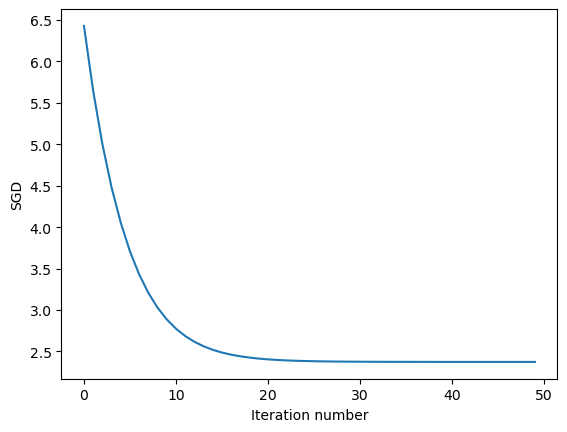

In [32]:
fig, ax = plt.subplots()
ax.plot(np.array(losses))
ax.set_xlabel('Iteration number')
ax.set_ylabel('SGD')
plt.show()